In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy as sc
import random

In [3]:
!ls "/content/gdrive/My Drive/datasets"

test.csv  train.feather


In [5]:
!pip install feather-format

    100% |████████████████████████████████| 11.6MB 1.9MB/s 
  Running setup.py bdist_wheel for feather-format ... - \ done
  Stored in directory: /root/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
Successfully built feather-format


In [3]:
train_df1 = pd.read_feather("/content/gdrive/My Drive/datasets/train.feather")

/usr/local/lib/python3.6/dist-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


# Data Preprocessing Section and Feature Engineering

In [0]:
train_df = train_df1.sample(frac = 0.05)

In [5]:
train_df.shape

(2771193, 7)

In [0]:
train_df = train_df[(train_df['fare_amount']>0)]
train_df = train_df[(train_df['fare_amount']<=50)]

In [0]:
#train_df = train_df[(train_df['pickup_latitude']>0)]
train_df = train_df[(train_df['pickup_latitude']>39)] #-->111 #there are only 20 <39 and 111 greater than 4 so removing them
train_df = train_df[(train_df['pickup_latitude']<42)]

In [0]:
train_df = train_df[(train_df['pickup_longitude']>-75)]
train_df = train_df[(train_df['pickup_longitude']<-72)]

In [0]:
train_df = train_df[(train_df['dropoff_longitude']>-75)]
train_df = train_df[(train_df['dropoff_longitude']<-72)]

In [0]:
train_df = train_df[(train_df['dropoff_latitude']>39)] #-->111 #there are only 20 <39 and 111 greater than 4 so removing them
train_df = train_df[(train_df['dropoff_latitude']<42)]

In [0]:
train_df = train_df[(train_df['passenger_count']>0)]

In [0]:
#Adding features based on date time parameter

In [0]:
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'])

In [0]:
train_df['year'] = train_df['pickup_datetime'].dt.year

In [0]:
train_df['day'] = train_df['pickup_datetime'].dt.weekday

In [0]:

train_df["hour"] = pd.Series(train_df["pickup_datetime"].dt.hour.values,index = train_df.index)

In [0]:
train_df["time"] = train_df['pickup_datetime'].dt.time

In [0]:
train_df["month"] = train_df['pickup_datetime'].dt.month

In [0]:
train_df['minutes'] = train_df['pickup_datetime'].dt.minute + 60*train_df['pickup_datetime'].dt.hour

**Spherical, Eucledian, Manhattan distance,location based features**

In [0]:
def distanceH(pickup1,pickup2,destination1,destination2):   #spherical distance  
    lat1, lon1 = pickup1,pickup2
    lat2, lon2 = destination1,destination2
    radius = 3959 # miles

    dlat = np.radians(lat2-lat1)
    dlon = np.radians(lon2-lon1)
    a = np.sin(dlat/2) * np.sin(dlat/2) + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon/2) * np.sin(dlon/2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = radius * c
    #d = pd.Series(d,index = train_df.index)

    return d

In [0]:
def distanceE(pickup1,pickup2,destination1,destination2):  #Eucledian
    a = (destination1 - pickup1)*69
    b = (destination2 - pickup2)*69
    d = a**2+b**2
    c = np.sqrt(d)
    #c = pd.Series(c,index = train_df.index)
    return c

In [0]:
def distanceM(pickup1,pickup2,destination1,destination2):
  c = np.abs((pickup1 - destination1)*69) + np.abs((pickup2 - destination2) * 69)
 # c = pd.Series(c,index = train_df.index)
  return c
  
  

In [0]:
a = train_df['pickup_latitude'].values
b = train_df['pickup_longitude'].values
c = train_df['dropoff_latitude'].values
d = train_df['dropoff_longitude'].values

In [0]:
dist = distanceH(train_df['pickup_latitude'].values,train_df['pickup_longitude'].values,train_df['dropoff_latitude'].values,train_df['dropoff_longitude'].values)
dist = pd.Series(dist,index = train_df.index)
train_df['distance_sp'] = dist

In [0]:
dist1 = distanceE(train_df['pickup_latitude'].values,train_df['pickup_longitude'].values,train_df['dropoff_latitude'].values,train_df['dropoff_longitude'].values)
dist1 = pd.Series(dist1,index = train_df.index)
train_df['distance_eucle'] = dist1


In [0]:
dist2 = distanceM(train_df['pickup_latitude'].values,train_df['pickup_longitude'].values,train_df['dropoff_latitude'].values,train_df['dropoff_longitude'].values)
dist2 = pd.Series(dist2,index = train_df.index)
train_df['distance_manh'] = dist2

In [0]:
train_df = train_df[(train_df['distance_eucle']<60)]

In [0]:
train_df["fare_per_mile"] = train_df.fare_amount / train_df.distance_manh

**Feature Engineering based on Location**

Central Park: 40.785091, -73.968285
Penn Station: 40.750580, -73.993584
Grand central: 40.7527° ,- 73.9772
La Gaurdia: 40.7769° ,- 73.8740
JFK: 40.6413° , 73.7781° 
Newark Airport: 40.6895° N, 74.1745° W







In [0]:
nyc1 = [40.785091, -73.968285]
nyc2 = [40.750580, -73.993584]
nyc3 = [40.7527 ,-73.9772]
nyc4 = [0.7769 ,-73.8740]
nyc5 = [40.6413 ,-73.7781 ]
nyc6 = [40.6895,-74.1745]


In [21]:
Central Park: 40.785091, -73.968285
Penn Station: 40.750580, -73.993584
Grand central: 40.7527° ,- 73.9772
La Gaurdia: 40.7769° ,- 73.8740
JFK: 40.6413° , 73.7781° 
Newark Airport: 40.6895° N, 74.1745° W


SyntaxError: ignored

In [0]:
train_df["cp"] = distanceE(train_df['pickup_latitude'].values,train_df['pickup_longitude'].values,nyc1[0],nyc1[1])
train_df["ps"] = distanceE(train_df['pickup_latitude'].values,train_df['pickup_longitude'].values,nyc2[0],nyc2[1])
train_df["gc"] = distanceE(train_df['pickup_latitude'].values,train_df['pickup_longitude'].values,nyc3[0],nyc3[1])
train_df["lg"] = distanceE(train_df['pickup_latitude'].values,train_df['pickup_longitude'].values,nyc4[0],nyc4[1])
train_df["jf"] = distanceE(train_df['pickup_latitude'].values,train_df['pickup_longitude'].values,nyc5[0],nyc5[1])
train_df["nw"] = distanceE(train_df['pickup_latitude'].values,train_df['pickup_longitude'].values,nyc6[0],nyc6[1])
train_df["cp1"] = distanceE(train_df['dropoff_latitude'].values,train_df['dropoff_longitude'].values,nyc1[0],nyc1[1])
train_df["ps1"] = distanceE(train_df['dropoff_latitude'].values,train_df['dropoff_longitude'].values,nyc2[0],nyc2[1])
train_df["gc1"] = distanceE(train_df['dropoff_latitude'].values,train_df['dropoff_longitude'].values,nyc3[0],nyc3[1])
train_df["lg1"] = distanceE(train_df['dropoff_latitude'].values,train_df['dropoff_longitude'].values,nyc4[0],nyc4[1])
train_df["jf1"] = distanceE(train_df['dropoff_latitude'].values,train_df['dropoff_longitude'].values,nyc5[0],nyc5[1])
train_df["nw1"] = distanceE(train_df['dropoff_latitude'].values,train_df['dropoff_longitude'].values,nyc6[0],nyc6[1])

In [0]:
train_df = train_df.drop("pickup_datetime", axis = 1)

In [24]:
train_df.dtypes

fare_amount                      float32
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float32
pickup_latitude                  float32
dropoff_longitude                float32
dropoff_latitude                 float32
passenger_count                    uint8
year                               int64
day                                int64
hour                               int64
time                              object
month                              int64
minutes                            int64
distance_eucle                   float32
distance_manh                    float32
dtype: object

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_sp,distance_eucle,distance_manh
count,5.337549e+07,5.337549e+07,5.337549e+07,5.337549e+07,5.337549e+07,5.337549e+07,5.337549e+07,5.337549e+07,5.337549e+07
mean,1.069499e+01,-7.397183e+01,4.075023e+01,-7.397065e+01,4.075037e+01,1.690683e+00,1.946789e+00,2.204092e+00,4.125143e-02
std,7.715761e+00,3.526749e-02,2.920402e-02,3.492744e-02,3.281778e-02,1.313596e+00,1.949486e+00,2.299361e+00,4.305605e-02
min,1.000000e-02,-7.499804e+01,3.903129e+01,-7.499828e+01,3.901662e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,-7.399233e+01,4.073690e+01,-7.399156e+01,4.073606e+01,1.000000e+00,7.746398e-01,8.786609e-01,1.626587e-02
50%,8.500000e+00,-7.398216e+01,4.075356e+01,-7.398064e+01,4.075404e+01,1.000000e+00,1.323486e+00,1.487754e+00,2.779770e-02
75%,1.250000e+01,-7.396863e+01,4.076767e+01,-7.396562e+01,4.076846e+01,2.000000e+00,2.371383e+00,2.605871e+00,4.954910e-02
max,5.000000e+01,-7.204471e+01,4.199717e+01,-7.201388e+01,4.199665e+01,2.080000e+02,6.005273e+01,5.998876e+01,1.227604e+00


# Pearson Correlation

In [0]:
train_df_small = train_df.iloc[0:300000,]

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


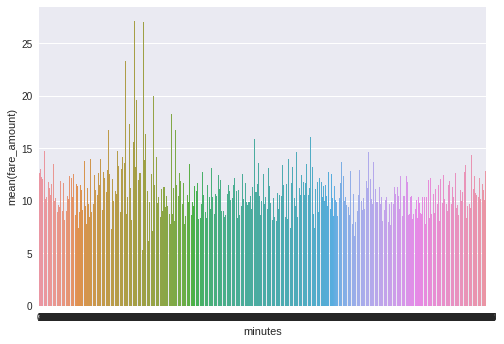

In [62]:
sns.barplot(x="minutes",y="fare_amount", data = train_df.iloc[0:30000],ci = None)

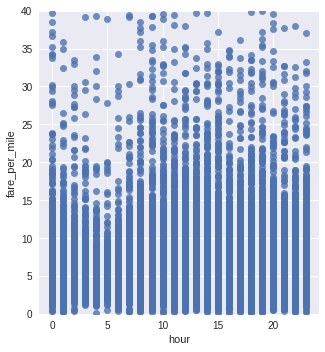

In [30]:
lm = sns.lmplot(x="hour",y="fare_per_mile", data = train_df.iloc[0:100000],ci = None)
lm.set(ylim=(0, 40))

In [44]:
#ana
train_df.dtypes

fare_amount                      float32
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float32
pickup_latitude                  float32
dropoff_longitude                float32
dropoff_latitude                 float32
passenger_count                    uint8
year                               int64
day                                int64
hour                               int64
time                              object
month                              int64
distance_eucle                   float32
distance_manh                    float32
fare_per_mile                    float32
fpm                              float32
dtype: object

In [56]:
#ana
train_df_small[train_df_small["fare_amount"]>60].count()

fare_amount          666
pickup_datetime      666
pickup_longitude     666
pickup_latitude      666
dropoff_longitude    666
dropoff_latitude     666
passenger_count      666
distance_sp          666
distance_eucle       666
dtype: int64

In [0]:
#2 and 3

In [31]:
#Eucledian distance vs fare amount
p_coef = sc.stats.pearsonr(train_df["distance_eucle"].values,train_df["fare_amount"].values)
p_coef

(0.87591195, 0.0)

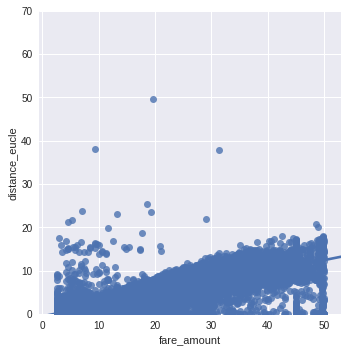

In [35]:
#plt.scatter(train_df["fare_amount"].values, train_df["distance_eucle"].values )
#plt.ylabel("distance")
#plt.xlabel("fare")

lm = sns.lmplot(x="fare_amount",y="distance_eucle", data = train_df.iloc[0:100000],ci = None)
lm.set(ylim=(0, 70))

From this we can observe though pearson coeffiecnt is quite high that there are still few outliers in our data for example for eucldian distance of 60 fare is less than 10 and for in many cases eucldian distance of 10 fare is 50, so though it shows some strong relationship eucledian distance is not a great parameter. One thing I will try to dind out is as NYC has grid road system we should only find out distance between lattitude and logitude and not the eucledian distance.

In [31]:
#Manhattan Distance to fare_amount
p_coef = sc.stats.pearsonr(train_df["distance_manh"].values,train_df["fare_amount"].values)
p_coef

(0.8584743, 0.0)

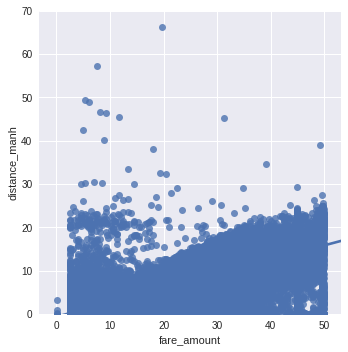

In [36]:
#plt.scatter(train_df_small["fare_amount"].values, train_df_small["distance_manh"].values )
lm = sns.lmplot(x="fare_amount",y="distance_manh", data = train_df.iloc[0:500000],ci = None)
lm.set(ylim=(0, 70))

This at least shows some similarity but somehow pearson coefficent is less! moving on I hust realised why manhattan distance is called Manhattan Distance.

In [0]:
#Spherical distance vs fare amount
p_coef = sc.stats.pearsonr(train_df["distance_eucle"].values,train_df["ho"])
p_coef

In [37]:
#time of day vs taxi fare
p_coef = sc.stats.pearsonr(train_df["minutes"],train_df["fare_amount"].values)
p_coef

(-0.01725520635048126, 7.317890417879327e-175)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


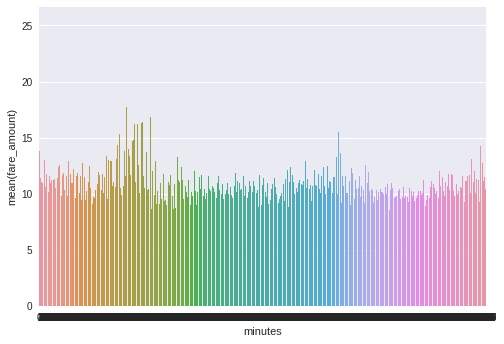

In [39]:
#sns.barplot(x=train_df["pickup_datetime"].dt.hour.values,y=train_df["fare_amount"].values)
sns.barplot(x="minutes",y="fare_amount", data = train_df.iloc[0:100000],ci = None)


In [41]:
#pickup datetime vs distance
p_coef1 = sc.stats.pearsonr(train_df["minutes"].values,train_df["distance_eucle"].values)
p_coef1

(-0.03204795338850599, 0.0)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


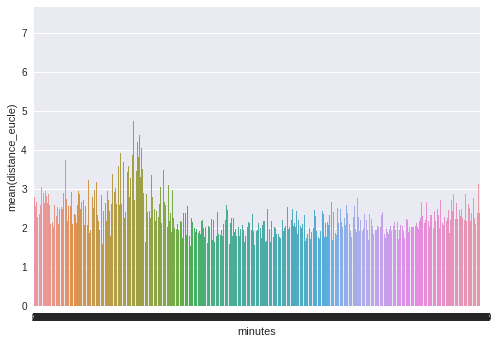

In [43]:
sns.barplot(x="minutes",y="distance_eucle",data = train_df.iloc[0:100000],ci = None)


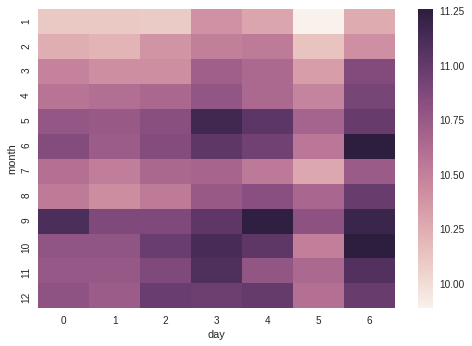

In [80]:
day_impact = train_df.pivot_table(index='month',columns = "day" ,values='fare_amount')
sns.heatmap(data = day_impact)

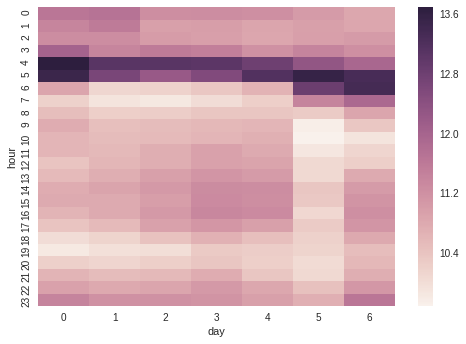

In [45]:
hour_impact = train_df.pivot_table(index='hour',columns = "day" ,values='fare_amount')
sns.heatmap(data = hour_impact)

**Transforming Test Data**

In [0]:
test_df = pd.read_csv("/content/gdrive/My Drive/datasets/test.csv")

In [0]:
test_df['pickup_datetime'] = pd.to_datetime(test_df['pickup_datetime'])

In [0]:
test_df['year'] = test_df['pickup_datetime'].dt.year
test_df["hour"] = pd.Series(test_df["pickup_datetime"].dt.hour.values,index = test_df.index)
test_df['day'] = test_df['pickup_datetime'].dt.weekday
test_df["time"] = test_df['pickup_datetime'].dt.time
test_df["month"] = test_df['pickup_datetime'].dt.month
test_df['minutes'] = test_df['pickup_datetime'].dt.minute + 60*test_df['pickup_datetime'].dt.hour

In [0]:
test_df["cp"] = distanceE(test_df['pickup_latitude'].values,test_df['pickup_longitude'].values,nyc1[0],nyc1[1])
test_df["ps"] = distanceE(test_df['pickup_latitude'].values,test_df['pickup_longitude'].values,nyc2[0],nyc2[1])
test_df["gc"] = distanceE(test_df['pickup_latitude'].values,test_df['pickup_longitude'].values,nyc3[0],nyc3[1])
test_df["lg"] = distanceE(test_df['pickup_latitude'].values,test_df['pickup_longitude'].values,nyc4[0],nyc4[1])
test_df["jf"] = distanceE(test_df['pickup_latitude'].values,test_df['pickup_longitude'].values,nyc5[0],nyc5[1])
test_df["nw"] = distanceE(test_df['pickup_latitude'].values,test_df['pickup_longitude'].values,nyc6[0],nyc6[1])
test_df["cp1"] = distanceE(test_df['dropoff_latitude'].values,test_df['dropoff_longitude'].values,nyc1[0],nyc1[1])
test_df["ps1"] = distanceE(test_df['dropoff_latitude'].values,test_df['dropoff_longitude'].values,nyc2[0],nyc2[1])
test_df["gc1"] = distanceE(test_df['dropoff_latitude'].values,test_df['dropoff_longitude'].values,nyc3[0],nyc3[1])
test_df["lg1"] = distanceE(test_df['dropoff_latitude'].values,test_df['dropoff_longitude'].values,nyc4[0],nyc4[1])
test_df["jf1"] = distanceE(test_df['dropoff_latitude'].values,test_df['dropoff_longitude'].values,nyc5[0],nyc5[1])
test_df["nw1"] = distanceE(test_df['dropoff_latitude'].values,test_df['dropoff_longitude'].values,nyc6[0],nyc6[1])

In [0]:
dist2 = distanceM(test_df['pickup_latitude'].values,test_df['pickup_longitude'].values,test_df['dropoff_latitude'].values,test_df['dropoff_longitude'].values)
dist2 = pd.Series(dist2,index = test_df.index)
test_df['distance_manh'] = dist2

In [0]:
dist1 = distanceE(test_df['pickup_latitude'].values,test_df['pickup_longitude'].values,test_df['dropoff_latitude'].values,test_df['dropoff_longitude'].values)
dist1 = pd.Series(dist1,index = test_df.index)
test_df['distance_eucle'] = dist1

In [53]:
test_df.dtypes,train_df.dtypes

(key                          object
 pickup_datetime      datetime64[ns]
 pickup_longitude            float64
 pickup_latitude             float64
 dropoff_longitude           float64
 dropoff_latitude            float64
 passenger_count               int64
 year                          int64
 hour                          int64
 day                           int64
 time                         object
 month                         int64
 minutes                       int64
 distance_manh               float64
 distance_eucle              float64
 dtype: object, fare_amount                      float32
 pickup_datetime      datetime64[ns, UTC]
 pickup_longitude                 float32
 pickup_latitude                  float32
 dropoff_longitude                float32
 dropoff_latitude                 float32
 passenger_count                    uint8
 year                               int64
 day                                int64
 hour                               int64
 time     

# Machine Learning Section

**Linear Regression**

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.utils import shuffle

In [0]:
model=LinearRegression()


In [0]:
train_df = shuffle(train_df)

In [0]:
param = ['distance_eucle','distance_manh','hour','year','pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(train_df[param], train_df['fare_amount'],test_size=0.2)

In [0]:
X_train,y_train = 

In [60]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
val_pred = model.predict(X_valid)

In [62]:
loss = np.sqrt(mean_squared_error(y_valid,val_pred))
loss

3.553424194049031

In [64]:
importances = model.coef_
importances

array([  4.95139423,  -1.60473438,  -0.03209673,   0.01261813,
         0.43518427,   3.83612049,   7.3151523 , -11.42807474,
         1.43619096])

In [0]:
pred = model.predict(test_df[param])

In [0]:
param = ['hour','distance_eucle','year','day','distance_manh']

**Random Forest**

In [0]:
rand_forest_regressor = RandomForestRegressor()


In [69]:
rand_forest_regressor.fit(X_train[0:1000000], y_train[0:1000000])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [0]:
val_pred = rand_forest_regressor.predict(X_valid)

In [71]:
loss = np.sqrt(mean_squared_error(y_valid,val_pred))
loss

3.097954669072087

In [0]:
pred = rand_forest_regressor.predict(test_df[param])

**XGB boost**

In [93]:
XGB_model = XGBRegressor(learning_rate=0.3, max_depth=6, n_estimators=500)
XGB_model.fit(X_train[0:1500000], y_train[0:1500000])



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.3, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [94]:
y_XGB_predict = XGB_model.predict(X_valid)
loss = np.sqrt(mean_squared_error(y_valid,y_XGB_predict))
loss

2.8626633

In [0]:
pred3 = XGB_model.predict(test_df[param])

# Convert to CSV

In [0]:
sub1 = pd.DataFrame()

In [0]:
sub['key'] = test_df['key']

In [0]:
sub['fare_amount'] = pred

In [55]:
sub.tail()

,key,fare_amount
9909,2015-05-10 12:37:51.0000002,9.477259
9910,2015-01-12 17:05:51.0000001,11.844451
9911,2015-04-19 20:44:15.0000001,49.370930
9912,2015-01-31 01:05:19.0000005,20.862108
9913,2015-01-18 14:06:23.0000006,8.219004


In [0]:
su5 = pd.DataFrame({"key": test_df['key'],"fare_amount": pred3},columns = ['key','fare_amount'])


In [0]:
su5.to_csv("submission8.csv", index = False)